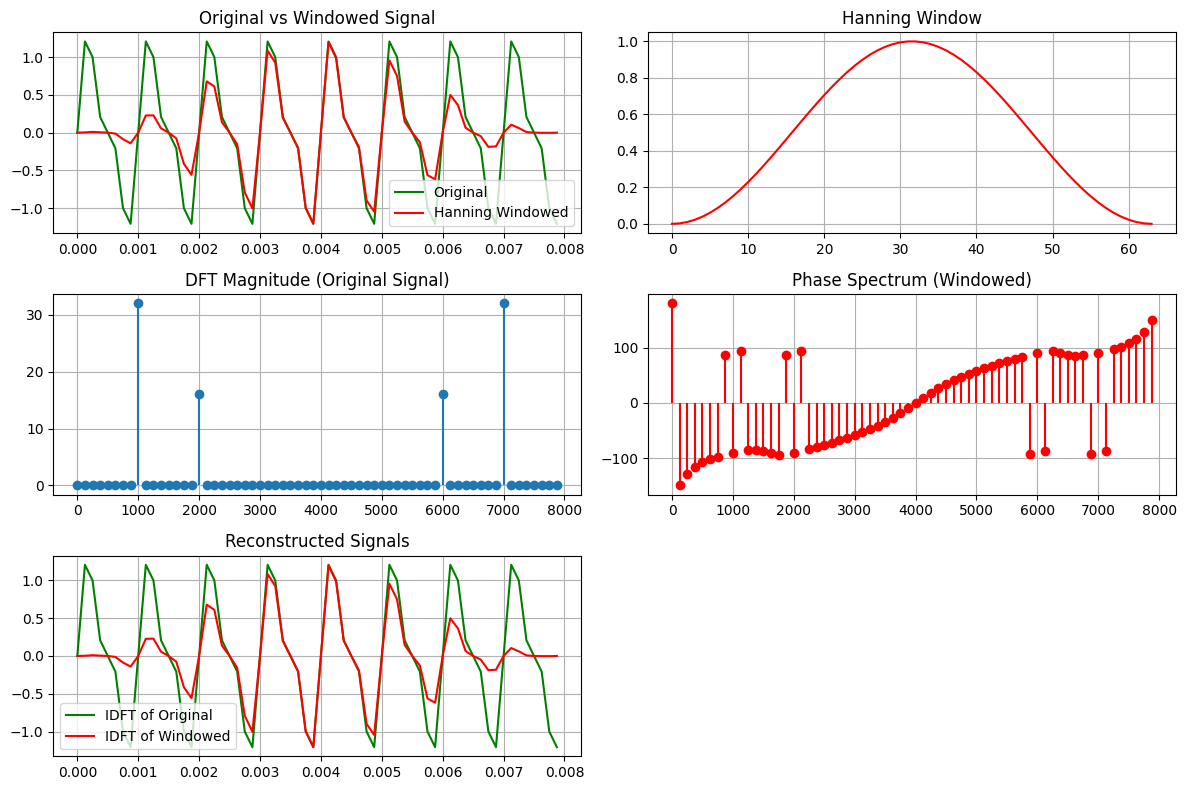

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# 1. Setup
# --------------------------------------
N = 64
fs = 8000
n = np.arange(N)
t = n / fs

# --------------------------------------
# 2. Signal: sin(2000πt) + 0.5sin(4000πt + 4π)
# (which simplifies to sin(1000Hz) + 0.5sin(2000Hz))
# --------------------------------------
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t)

# --------------------------------------
# 3. Apply Hanning Window
# --------------------------------------
window = np.hanning(N)
x_windowed = x * window

# --------------------------------------
# 4. Compute DFT using FFT
# --------------------------------------
X = np.fft.fft(x)
Xw = np.fft.fft(x_windowed)
freq = np.arange(N) * fs / N

# --------------------------------------
# 5. Reconstruct signal using IFFT
# --------------------------------------
x_idft = np.fft.ifft(X).real
x_idft_windowed = np.fft.ifft(Xw).real

# --------------------------------------
# 6. Plotting
# --------------------------------------
plt.figure(figsize=(12, 8))

# Original and Windowed Signals
plt.subplot(3, 2, 1)
plt.plot(t, x, label="Original", color='g')
plt.plot(t, x_windowed, label="Hanning Windowed", color='r')
plt.title("Original vs Windowed Signal")
plt.legend()
plt.grid()

# Hanning Window
plt.subplot(3, 2, 2)
plt.plot(window, label="Hanning Window", color='r')
plt.title("Hanning Window")
plt.grid()

# Frequency Spectrum (Original)
plt.subplot(3, 2, 3)
plt.stem(freq, np.abs(X), basefmt=" ", label="|X(f)|")
plt.title("DFT Magnitude (Original Signal)")
plt.grid()

# Phase Spectrum (Windowed)
plt.subplot(3, 2, 4)
plt.stem(freq, np.angle(Xw, deg=True), basefmt=" ", linefmt="r-", markerfmt="ro", label="Phase")
plt.title("Phase Spectrum (Windowed)")
plt.grid()

# IDFT Signals
plt.subplot(3, 2, 5)
plt.plot(t, x_idft, label="IDFT of Original", color='g')
plt.plot(t, x_idft_windowed, label="IDFT of Windowed", color='r')
plt.title("Reconstructed Signals")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
